In [10]:
#Joseph Cormier
#Professor Leili Shahyriyari

#import some useful libraries
import os
import pandas as pd
import seaborn as sns
import scipy.stats as sp
from scipy import stats
import matplotlib.pylab as plt
import numpy as np
from scipy.stats import mannwhitneyu
from statannot import add_stat_annotation
import matplotlib.pylab as plt
from matplotlib.lines import Line2D

In [11]:
#use read_csv for better performance (source: https://stackoverflow.com/questions/31362573/performance-difference-in-pandas-read-table-vs-read-csv-vs-from-csv-vs-read-e)

#reading the data from the location of the data
notebook_path=os.path.dirname(r'TCGA Lung Adenocarcinoma.ipynb')
#location_of_data=notebook_path
#rna_file_name= r"HiSeqV2_PANCAN.csv"
#rna_file_path= r"C:\Users\Joseph\Downloads\REU\working project\xena\""
rna_file_path_name = r'C:\Users\Joseph\Downloads\REU\working project\xena\HiSeqV2_PANCAN.csv'
survival_file_path_name = r'C:\Users\Joseph\Downloads\REU\working project\xena\clinical\LUAD_survival.csv'
clinical_file_path_name = r'C:\Users\Joseph\Downloads\REU\working project\xena\clinical\LUAD_clinicalMatrix.csv'

In [12]:
print(notebook_path) #i dont know why this is returning null

In [13]:
rna = pd.read_csv(rna_file_path_name)
#to make sure we do not process the name of genes we will convert them to string
rna['sample'] = rna['sample'].astype(str)
#want to switch sample label to patient so clinical data will concat easier
rna = rna.rename(columns={"sample":"patient"})
rna.head()

,patient,TCGA-69-7978-01,TCGA-62-8399-01,TCGA-78-7539-01,TCGA-50-5931-11,TCGA-73-4658-01,TCGA-44-6775-01,TCGA-44-2655-01,TCGA-44-3398-01,TCGA-62-8397-01,...,TCGA-75-7025-01,TCGA-55-7726-01,TCGA-L9-A743-01,TCGA-86-8358-01,TCGA-55-6972-01,TCGA-55-7727-01,TCGA-91-6831-01,TCGA-MN-A4N4-01,TCGA-55-8302-01,TCGA-MP-A4TK-01
0,ARHGEF10L,0.125808,0.561708,-0.237592,-1.180492,-0.656192,0.139908,-0.537692,-0.839092,0.677108,...,0.226508,-2.342092,-0.207692,-0.659792,-1.651292,-2.621192,-1.025192,0.070108,0.305608,0.263208
1,HIF3A,-1.294926,6.069174,3.581474,3.927674,-0.525926,-1.497426,-0.021226,0.179974,1.092974,...,2.539674,-1.259526,-0.387226,3.689474,3.509374,1.986874,-1.993426,2.790974,-0.018326,4.657474
2,RNF17,-0.112935,-0.531035,0.592065,0.291065,-0.531035,0.475865,0.071065,-0.531035,-0.531035,...,-0.068235,-0.531035,0.428265,0.202865,0.567665,0.408165,-0.531035,0.440465,-0.531035,0.049365
3,RNF10,-1.411872,-0.228672,-0.108372,-0.043472,-0.156672,-0.605472,0.139328,-0.450172,0.583528,...,-0.451572,0.261228,-0.331772,-0.213372,-0.189472,0.091028,0.492828,0.037428,0.003728,-0.334572
4,RNF11,0.203922,0.052122,-0.499978,0.710822,0.373522,0.129022,0.436522,0.529622,0.314922,...,-0.155778,0.362522,-0.520578,0.031222,-0.966478,0.318322,0.150822,-0.357778,-0.451578,0.156422


In [14]:
def normalizing_patients(df_rna):
    
    """
        input df_rna: rna-seq data frame that includes the column 'patient'
            columns are patients, and rows are genes
        output df_normalized_rna: normalized (scaled) data
        function:  using pandas methods dividing the value of each gene for each patient 
                by the maximum value of that patient.
    """
    
    #drop name of genes
    df_rna_values =  df_rna.drop(['patient'], axis=1) 
    
    #finding maximum level expression of genes for each patient
    Max_each_patient = df_rna_values.max(axis=0)
    
    #Divide the values of each gene by the maximum value of gene expression of the same patient patient
    df_normalized_rna_values = df_rna_values.divide(Max_each_patient, axis=1)
    
    #concat the name of genes to the normalized dataframe
    df_normalized_rna = pd.concat([df_rna['patient'], df_normalized_rna_values], axis=1)
    
    return df_normalized_rna

In [15]:
normalized_rna = normalizing_patients(rna)
normalized_rna =  normalized_rna.set_index(['patient'])
normalized_rna.head()

,TCGA-69-7978-01,TCGA-62-8399-01,TCGA-78-7539-01,TCGA-50-5931-11,TCGA-73-4658-01,TCGA-44-6775-01,TCGA-44-2655-01,TCGA-44-3398-01,TCGA-62-8397-01,TCGA-53-A4EZ-01,...,TCGA-75-7025-01,TCGA-55-7726-01,TCGA-L9-A743-01,TCGA-86-8358-01,TCGA-55-6972-01,TCGA-55-7727-01,TCGA-91-6831-01,TCGA-MN-A4N4-01,TCGA-55-8302-01,TCGA-MP-A4TK-01
patient,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,0.010088,0.044537,-0.019065,-0.072812,-0.050064,0.012833,-0.036592,-0.059766,0.046155,0.092983,...,0.017269,-0.242817,-0.015542,-0.054533,-0.103855,-0.189069,-0.071752,0.005567,0.025109,0.024307
HIF3A,-0.103839,0.481212,0.287385,0.242257,-0.040125,-0.137349,-0.001445,0.012819,0.074502,0.220494,...,0.193628,-0.130582,-0.028977,0.304943,0.220715,0.143315,-0.139517,0.221607,-0.001506,0.430117
RNF17,-0.009056,-0.042105,0.047509,0.017953,-0.040515,0.043648,0.004836,-0.037824,-0.036198,-0.047804,...,-0.005202,-0.055055,0.032048,0.016767,0.035702,0.029441,-0.037166,0.034974,-0.043629,0.004559
RNF10,-0.113216,-0.018131,-0.008696,-0.002681,-0.011953,-0.055536,0.009482,-0.032064,0.039776,0.053889,...,-0.034428,0.027083,-0.024827,-0.017636,-0.011916,0.006566,0.034492,0.002972,0.000306,-0.030898
RNF11,0.016352,0.004133,-0.040119,0.043843,0.028498,0.011834,0.029707,0.037723,0.021467,-0.059511,...,-0.011877,0.037585,-0.038956,0.002581,-0.060785,0.022961,0.010556,-0.028408,-0.037101,0.014446


# normalized df has negative values

In [16]:
def normalizing_patients_sl(df_rna):
    
    """
        input df_rna: rna-seq data frame that includes the column 'patient'
            columns are patients, and rows are genes
        output df_normalized_rna: normalized (scaled) data
        function:  using Scikit-learn methods dividing the value of each gene for each patient 
                by the maximum value of that patient.
                
        Note that in Scikit learn features are assumed to be in columns and here we want to normalized 
        the values of columns not the features which are the genes.
    """
    
    from sklearn.preprocessing import MaxAbsScaler
    
    
    #drop name of genes
    df_rna_values =  df_rna.drop(['patient'], axis=1) 
    
    #This estimator scales each feature by its maximum absolute value.
    #The output of fit_tansform is an ndarray
    array_normalized_rna_values = MaxAbsScaler().fit_transform(df_rna_values)
    
    #df_rna_values.columns.values.tolist() give us the name of columns
    #convernting ndarray to dataframe
    df_normalized_rna_values = pd.DataFrame(array_normalized_rna_values,  columns= df_rna_values.columns.values.tolist())
    
    #concat the name of genes to the normalized dataframe
    df_normalized_rna = pd.concat([df_rna['patient'], df_normalized_rna_values], axis=1)
    df_normalized_rna=df_normalized_rna.set_index(['patient'])
    return df_normalized_rna

In [17]:
normalized_rna_by_scikit = normalizing_patients_sl(rna)

normalized_rna_by_scikit.head()

,TCGA-69-7978-01,TCGA-62-8399-01,TCGA-78-7539-01,TCGA-50-5931-11,TCGA-73-4658-01,TCGA-44-6775-01,TCGA-44-2655-01,TCGA-44-3398-01,TCGA-62-8397-01,TCGA-53-A4EZ-01,...,TCGA-75-7025-01,TCGA-55-7726-01,TCGA-L9-A743-01,TCGA-86-8358-01,TCGA-55-6972-01,TCGA-55-7727-01,TCGA-91-6831-01,TCGA-MN-A4N4-01,TCGA-55-8302-01,TCGA-MP-A4TK-01
patient,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,0.010088,0.044537,-0.019065,-0.072812,-0.050064,0.012833,-0.036592,-0.059766,0.046155,0.092983,...,0.017269,-0.242817,-0.015542,-0.054533,-0.103855,-0.189069,-0.071752,0.005567,0.025109,0.024307
HIF3A,-0.103839,0.481212,0.287385,0.242257,-0.040125,-0.137349,-0.001445,0.012819,0.074502,0.220494,...,0.193628,-0.130582,-0.028977,0.304943,0.220715,0.143315,-0.139517,0.221607,-0.001506,0.430117
RNF17,-0.009056,-0.042105,0.047509,0.017953,-0.040515,0.043648,0.004836,-0.037824,-0.036198,-0.047804,...,-0.005202,-0.055055,0.032048,0.016767,0.035702,0.029441,-0.037166,0.034974,-0.043629,0.004559
RNF10,-0.113216,-0.018131,-0.008696,-0.002681,-0.011953,-0.055536,0.009482,-0.032064,0.039776,0.053889,...,-0.034428,0.027083,-0.024827,-0.017636,-0.011916,0.006566,0.034492,0.002972,0.000306,-0.030898
RNF11,0.016352,0.004133,-0.040119,0.043843,0.028498,0.011834,0.029707,0.037723,0.021467,-0.059511,...,-0.011877,0.037585,-0.038956,0.002581,-0.060785,0.022961,0.010556,-0.028408,-0.037101,0.014446


In [18]:
def checking(df, normalized_df):
    """
        input df: the   pandas data frame
        input normalized_df: the normalized dataframe 
        output : a message 
        function: checking if the normalization method has been correctly implemented.
    """
    
    from pandas.testing import assert_frame_equal
    
    normalized_rna_by_scikit = normalizing_patients_sl(df)
    try:
        assert_frame_equal(normalized_rna_by_scikit,normalized_df)
        return "it is correct"
    except:
        return "There is an error"

In [19]:
checking(rna, normalized_rna)

'it is correct'

In [20]:
#find the variance of each genes 
var_genes=normalized_rna.var(axis=1)
#add a new coloum in the data frame
normalized_rna['Variance'] = var_genes.values

normalized_rna.head()

,TCGA-69-7978-01,TCGA-62-8399-01,TCGA-78-7539-01,TCGA-50-5931-11,TCGA-73-4658-01,TCGA-44-6775-01,TCGA-44-2655-01,TCGA-44-3398-01,TCGA-62-8397-01,TCGA-53-A4EZ-01,...,TCGA-55-7726-01,TCGA-L9-A743-01,TCGA-86-8358-01,TCGA-55-6972-01,TCGA-55-7727-01,TCGA-91-6831-01,TCGA-MN-A4N4-01,TCGA-55-8302-01,TCGA-MP-A4TK-01,Variance
patient,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,0.010088,0.044537,-0.019065,-0.072812,-0.050064,0.012833,-0.036592,-0.059766,0.046155,0.092983,...,-0.242817,-0.015542,-0.054533,-0.103855,-0.189069,-0.071752,0.005567,0.025109,0.024307,0.003306
HIF3A,-0.103839,0.481212,0.287385,0.242257,-0.040125,-0.137349,-0.001445,0.012819,0.074502,0.220494,...,-0.130582,-0.028977,0.304943,0.220715,0.143315,-0.139517,0.221607,-0.001506,0.430117,0.027817
RNF17,-0.009056,-0.042105,0.047509,0.017953,-0.040515,0.043648,0.004836,-0.037824,-0.036198,-0.047804,...,-0.055055,0.032048,0.016767,0.035702,0.029441,-0.037166,0.034974,-0.043629,0.004559,0.004997
RNF10,-0.113216,-0.018131,-0.008696,-0.002681,-0.011953,-0.055536,0.009482,-0.032064,0.039776,0.053889,...,0.027083,-0.024827,-0.017636,-0.011916,0.006566,0.034492,0.002972,0.000306,-0.030898,0.000697
RNF11,0.016352,0.004133,-0.040119,0.043843,0.028498,0.011834,0.029707,0.037723,0.021467,-0.059511,...,0.037585,-0.038956,0.002581,-0.060785,0.022961,0.010556,-0.028408,-0.037101,0.014446,0.001314


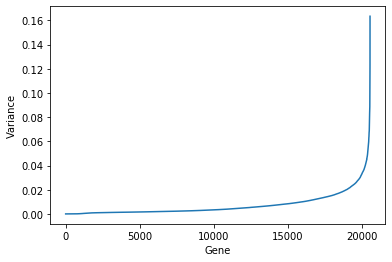

In [21]:
#plot the variance

plt.plot(sorted(var_genes))
plt.xlabel('Gene')
plt.ylabel('Variance')
plt.savefig('sorted_variance.eps', format='eps',bbox_inches='tight', dpi=1000)

In [22]:
#sorted the variance and finding the top 10 variance
sorted_var_genes=sorted(var_genes)
sorted_var_genes[-10:]

[0.1002654207067927,
 0.10344626201929076,
 0.10866486476464425,
 0.11726813662597635,
 0.11881424493188472,
 0.11884352966783267,
 0.12295099956006596,
 0.12328044362054667,
 0.16048293679433462,
 0.1634594178675486]

In [23]:
# Finding genes that has top 10 high variance
top_10_var_rna = normalized_rna[normalized_rna['Variance']>=0.1002654207067927]
#drop variance column
top_10_var_rna=top_10_var_rna.drop(columns=['Variance'])
# top 10 genes with the highest variance
top_10_var_rna

,TCGA-69-7978-01,TCGA-62-8399-01,TCGA-78-7539-01,TCGA-50-5931-11,TCGA-73-4658-01,TCGA-44-6775-01,TCGA-44-2655-01,TCGA-44-3398-01,TCGA-62-8397-01,TCGA-53-A4EZ-01,...,TCGA-75-7025-01,TCGA-55-7726-01,TCGA-L9-A743-01,TCGA-86-8358-01,TCGA-55-6972-01,TCGA-55-7727-01,TCGA-91-6831-01,TCGA-MN-A4N4-01,TCGA-55-8302-01,TCGA-MP-A4TK-01
patient,,,,,,,,,,,,,,,,,,,,,
XIST,-0.322611,-0.286097,0.259693,0.306804,0.214484,0.520012,0.315587,0.340511,0.401630,-0.348563,...,-0.348090,0.637775,-0.526382,-0.276127,-0.276102,-0.507380,-0.197259,-0.135049,-0.355367,0.503072
AKR1B10,0.221460,0.021791,-0.367033,-0.254395,-0.327370,-0.331705,0.384620,0.003272,0.086074,0.898210,...,-0.071290,0.237565,-0.274909,0.603256,0.167901,-0.356801,-0.346203,-0.392764,0.228513,-0.031857
SCGB1A1,0.579628,0.685824,0.002383,0.486090,0.679633,0.518264,0.577375,0.596424,0.123514,-0.118269,...,0.818685,0.376693,0.896112,0.483853,0.020465,0.053413,-0.056306,0.170840,0.337067,0.226284
XAGE1D,0.841570,0.768225,0.792710,0.039867,0.870977,0.577780,0.668219,0.754061,0.778328,-0.090357,...,-0.023607,0.991038,0.716983,-0.091524,0.742674,0.721380,0.594866,0.747069,0.762099,0.926412
FGB,0.262937,0.695638,-0.202485,-0.030693,-0.142497,-0.139100,-0.046245,-0.037339,0.036098,0.425705,...,-0.192389,-0.261617,0.529124,0.345748,-0.158705,0.542770,-0.055594,0.530034,0.132702,-0.019617
DDX3Y,0.330690,0.471563,-0.383855,-0.318033,-0.343365,-0.472945,-0.309928,-0.367260,-0.162389,0.164854,...,0.387220,-0.534571,0.355760,0.277578,0.284426,0.394635,0.359307,0.471834,0.356727,-0.354846
RPS4Y1,0.314323,0.441347,-0.464057,-0.328974,-0.469648,-0.472265,-0.396310,-0.353542,-0.169826,0.663604,...,0.420058,-0.638194,0.407223,0.215928,0.116245,0.462893,0.389325,0.511464,0.461538,-0.301116
PLUNC,0.509859,0.948603,0.057055,-0.084690,0.313574,0.815836,0.351777,0.709785,0.207837,-0.123604,...,0.529993,0.412839,0.764836,0.621638,0.357655,0.749732,1.000000,0.821999,0.253810,0.249486
SFTPC,0.484936,0.815779,0.300726,1.000000,0.755907,0.631618,0.902842,0.899076,0.316149,-0.023196,...,0.719780,0.090885,0.927289,0.623414,0.641245,0.728237,0.347299,0.006338,0.840114,0.965501


In [24]:
#transpose indexs
rna_top10 = top_10_var_rna.T
patient_id_rna = rna_top10.index

In [25]:
#truncate patient id
dic_patient_id = {id_:id_[:-3] for id_ in patient_id_rna}
rna_top10 = rna_top10.rename(dic_patient_id, axis='index')
rna_top10.head()

patient,XIST,AKR1B10,SCGB1A1,XAGE1D,FGB,DDX3Y,RPS4Y1,PLUNC,SFTPC,KDM5D
TCGA-69-7978,-0.322611,0.221460,0.579628,0.841570,0.262937,0.330690,0.314323,0.509859,0.484936,0.345821
TCGA-62-8399,-0.286097,0.021791,0.685824,0.768225,0.695638,0.471563,0.441347,0.948603,0.815779,0.495120
TCGA-78-7539,0.259693,-0.367033,0.002383,0.792710,-0.202485,-0.383855,-0.464057,0.057055,0.300726,-0.388124
TCGA-50-5931,0.306804,-0.254395,0.486090,0.039867,-0.030693,-0.318033,-0.328974,-0.084690,1.000000,-0.298338
TCGA-73-4658,0.214484,-0.327370,0.679633,0.870977,-0.142497,-0.343365,-0.469648,0.313574,0.755907,-0.369030


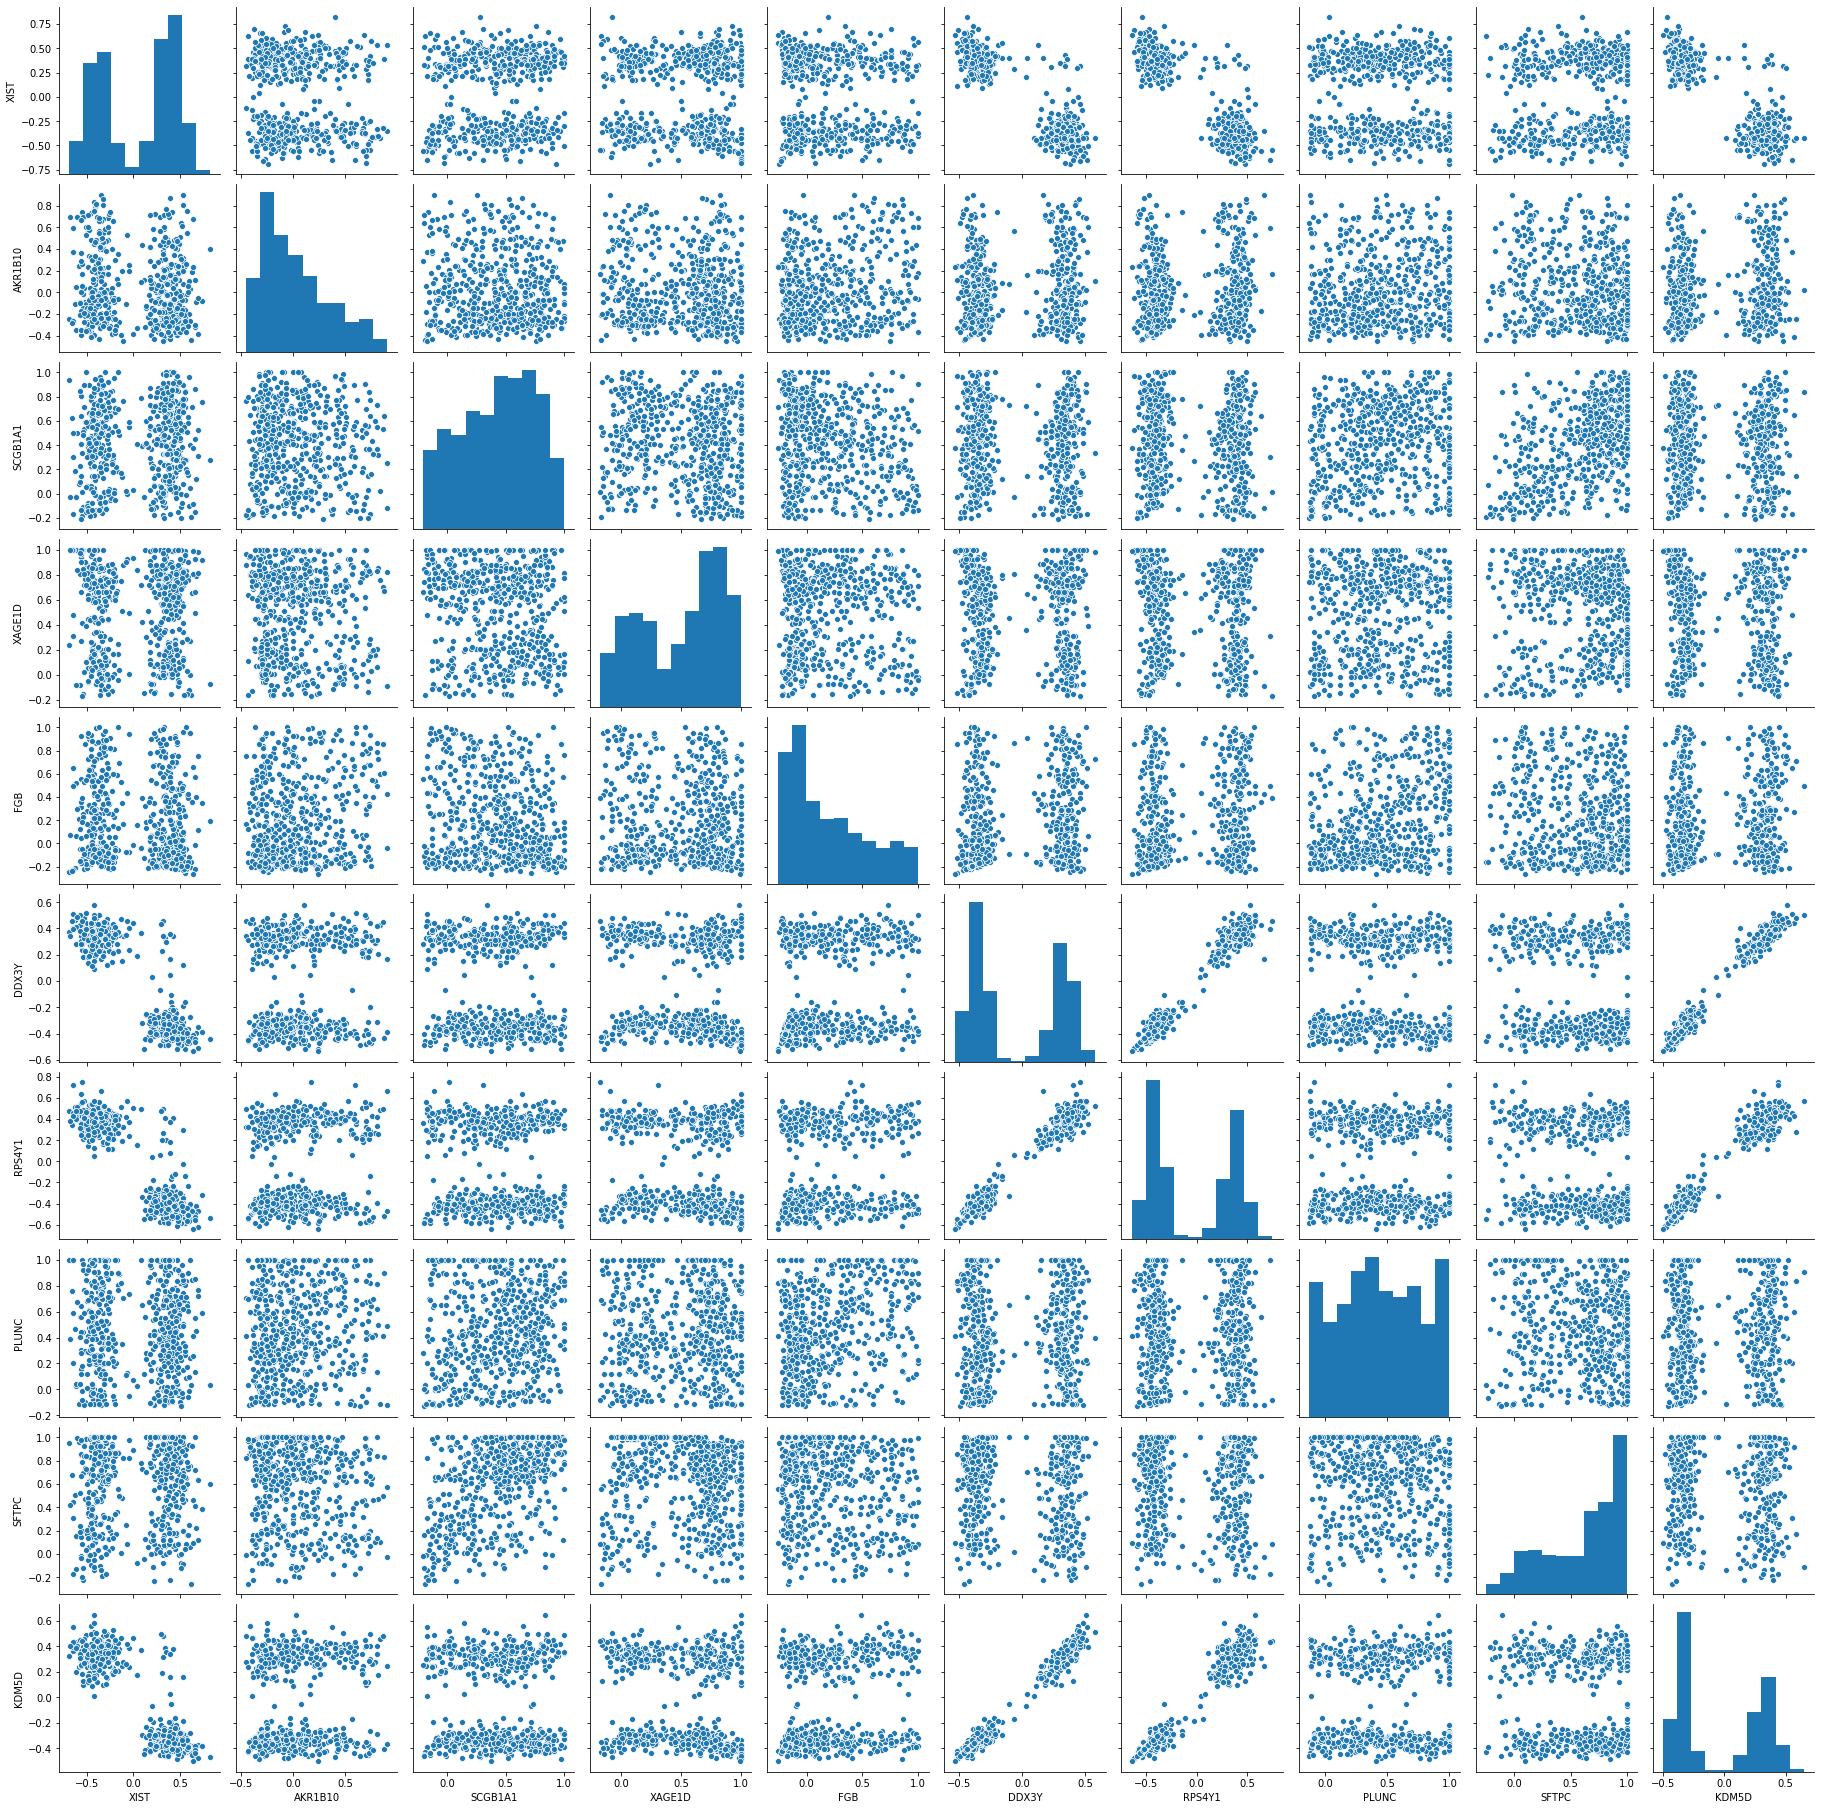

In [26]:
#correlation analysis of top 10 genes
sns.pairplot(rna_top10)

## clinical data:

In [27]:
#reading clinical data, renaming index, and truncating patient ID
clinical_data = pd.read_csv(clinical_file_path_name)
clinical_data = clinical_data.rename(columns={"sampleID":"patient"})
clinical_data = clinical_data.set_index(['patient'])

#truncate
patient_id = clinical_data.index
dic_patient_id = {id_:id_[:-3] for id_ in patient_id}
clinical_data = clinical_data.rename(dic_patient_id, axis='index')

clinical_data.head()

,ABSOLUTE_Ploidy,ABSOLUTE_Purity,AKT1,ALK_translocation,BRAF,CBL,CTNNB1,Canonical_mut_in_KRAS_EGFR_ALK,Cnncl_mt_n_KRAS_EGFR_ALK_RET_ROS1_BRAF_ERBB2_HRAS_NRAS_AKT1_MAP2,EGFR,...,_GENOMIC_ID_TCGA_LUAD_exp_HiSeqV2_exon,_GENOMIC_ID_TCGA_LUAD_miRNA_HiSeq,_GENOMIC_ID_TCGA_LUAD_RPPA_RBN,_GENOMIC_ID_TCGA_LUAD_exp_HiSeqV2_PANCAN,_GENOMIC_ID_TCGA_LUAD_PDMRNAseq,_GENOMIC_ID_TCGA_LUAD_RPPA,_GENOMIC_ID_TCGA_LUAD_exp_HiSeqV2_percentile,_GENOMIC_ID_TCGA_LUAD_mutation_broad_gene,_GENOMIC_ID_data/public/TCGA/LUAD/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_LUAD_miRNA_GA
patient,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,e6a101b9-61f9-4ed1-a59f-d9db3fdb4555,NaN,TCGA-05-4244-01A-21-2190-20,e6a101b9-61f9-4ed1-a59f-d9db3fdb4555,TCGA-05-4244-01,59881fe3-70f4-4fa0-9355-f50250872752,e6a101b9-61f9-4ed1-a59f-d9db3fdb4555,TCGA-05-4244-01A-01D-1105-08,NaN,TCGA-05-4244-01
TCGA-05-4249,3.77,0.46,none,NaN,p.A762E,none,none,Y,Y,none,...,d1a8d88d-1708-4959-9695-6f2e67853bd5,NaN,TCGA-05-4249-01A-21-2190-20,d1a8d88d-1708-4959-9695-6f2e67853bd5,TCGA-05-4249-01,5b46a235-49a6-43ea-91b6-82a384702477,d1a8d88d-1708-4959-9695-6f2e67853bd5,TCGA-05-4249-01A-01D-1105-08,NaN,TCGA-05-4249-01
TCGA-05-4250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,bba9333a-09f7-4585-b22e-e4ae4049f7da,NaN,TCGA-05-4250-01A-21-2190-20,bba9333a-09f7-4585-b22e-e4ae4049f7da,TCGA-05-4250-01,3f069d62-c371-4f30-bdb4-c58093bbb1d7,bba9333a-09f7-4585-b22e-e4ae4049f7da,TCGA-05-4250-01A-01D-1105-08,NaN,TCGA-05-4250-01
TCGA-05-4382,NaN,NaN,none,NaN,p.L613F,none,none,N,N,"p.R222L, p.E545Q",...,e4177b01-6898-4bb7-b38d-0c09f85c5668,NaN,NaN,e4177b01-6898-4bb7-b38d-0c09f85c5668,TCGA-05-4382-01,NaN,e4177b01-6898-4bb7-b38d-0c09f85c5668,TCGA-05-4382-01A-01D-1931-08,NaN,TCGA-05-4382-01
TCGA-05-4384,2.04,0.48,none,NaN,none,none,p.F777S,N,N,none,...,7d6cf896-b04a-431a-a192-aaf540eeaf77,TCGA-05-4384-01,TCGA-05-4384-01A-21-2190-20,7d6cf896-b04a-431a-a192-aaf540eeaf77,TCGA-05-4384-01,5e735c28-5f2b-47ec-98fb-2f57cc8a5d6a,7d6cf896-b04a-431a-a192-aaf540eeaf77,TCGA-05-4384-01A-01D-1753-08,TCGA-05-4384-01,NaN


In [28]:
#reading survival data, renaming index
survival_data = pd.read_csv(survival_file_path_name)
survival_data = survival_data.drop(columns='sample')
survival_data = survival_data.rename(columns={"_PATIENT":"patient"})
survival_data = survival_data.set_index(['patient'])

survival_data.head()

,OS,OS.time,DSS,DSS.time,DFI,DFI.time,PFI,PFI.time,Redaction
patient,,,,,,,,,
TCGA-05-4244,0,0.0,0.0,0.0,NaN,NaN,0,0.0,NaN
TCGA-05-4249,0,1523.0,0.0,1523.0,NaN,NaN,0,1523.0,NaN
TCGA-05-4250,1,121.0,NaN,121.0,NaN,NaN,0,121.0,NaN
TCGA-05-4382,0,607.0,0.0,607.0,1.0,334.0,1,334.0,NaN
TCGA-05-4384,0,426.0,0.0,426.0,NaN,NaN,1,183.0,NaN


In [29]:
#concat clinical data to rna and survival data

patients_clinical = clinical_data.index.array
patients_survival = survival_data.index.array
patients_rna = rna_top10.index.array

In [30]:
patients_clinical.shape

(706,)

In [31]:
patients_survival.shape

(641,)

In [32]:
patients_rna.shape

(576,)

In [33]:
patients_in_clinical_not_in_rna = [patient for patient in patients_clinical if patient not in patients_rna]
clinical_data_trunc = clinical_data.drop(index= patients_in_clinical_not_in_rna)
clinical_data_trunc= clinical_data_trunc[~clinical_data_trunc.index.duplicated(keep='first')]
clinical_data_trunc.shape


(516, 147)

In [34]:
patients_in_survival_not_in_rna = [patient for patient in patients_survival if patient not in patients_rna]
survival_data_trunc = survival_data.drop(index= patients_in_survival_not_in_rna)
survival_data_trunc= survival_data_trunc[~survival_data_trunc.index.duplicated(keep='first')]
survival_data_trunc.shape

(516, 9)

In [35]:
rna_top10_new= rna_top10[~rna_top10.index.duplicated(keep='first')]
rna_top10_new.shape

(516, 10)

In [36]:
clinical_survival_rna = pd.concat([clinical_data_trunc, survival_data_trunc, rna_top10_new], axis=1, sort=False)
clinical_survival_rna.head()

,ABSOLUTE_Ploidy,ABSOLUTE_Purity,AKT1,ALK_translocation,BRAF,CBL,CTNNB1,Canonical_mut_in_KRAS_EGFR_ALK,Cnncl_mt_n_KRAS_EGFR_ALK_RET_ROS1_BRAF_ERBB2_HRAS_NRAS_AKT1_MAP2,EGFR,...,XIST,AKR1B10,SCGB1A1,XAGE1D,FGB,DDX3Y,RPS4Y1,PLUNC,SFTPC,KDM5D
TCGA-05-4244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.451451,-0.227709,0.596209,0.742977,0.108616,0.221159,0.220288,0.558737,0.684958,0.236365
TCGA-05-4249,3.77,0.46,none,NaN,p.A762E,none,none,Y,Y,none,...,-0.427552,0.098616,0.802628,0.742039,0.215371,0.351332,0.435199,0.522055,0.652696,0.381521
TCGA-05-4250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.178136,-0.282073,0.537409,0.993534,0.018178,-0.452408,-0.540104,0.196928,0.779461,-0.424392
TCGA-05-4382,NaN,NaN,none,NaN,p.L613F,none,none,N,N,"p.R222L, p.E545Q",...,0.317588,-0.450626,-0.178985,0.965298,0.749794,0.459608,0.492902,0.415863,-0.006431,0.480191
TCGA-05-4384,2.04,0.48,none,NaN,none,none,p.F777S,N,N,none,...,-0.415334,0.337794,0.298491,0.579127,0.290276,0.315951,0.362752,1.000000,0.822484,0.349414


In [37]:
clinical_survival_rna.shape

(516, 166)

Text(0.5, 0, 'genes')

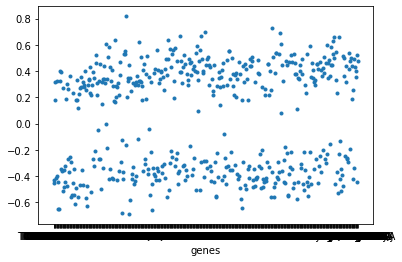

In [38]:
#see the XIST gene distribution
plt.plot(clinical_survival_rna['XIST'],linestyle='',marker ='.')

plt.xlabel('genes')

In [39]:
#we choose 0.0 level for divide the XIST gene expression high and low.
clinical_survival_rna.loc[(clinical_survival_rna['XIST']>=0.0),'XIST level']='high XIST'
clinical_survival_rna.loc[(clinical_survival_rna['XIST']<0.0),'XIST level']='low XIST'
clinical_survival_rna['XIST level'].value_counts()

high XIST    286
low XIST     230
Name: XIST level, dtype: int64

C:\Users\Joseph\anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Joseph\anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

high XIST v.s. low XIST: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.603e-01 U_stat=3.328e+04


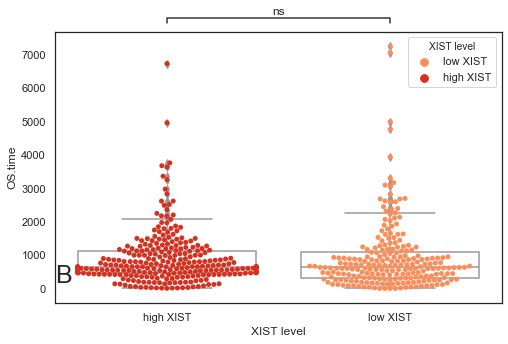

In [40]:
#graph of low and high XIST level and overall survival time 
sns.set(rc={'figure.figsize':(8,5)})

sns.set_style("white")

ax=sns.boxplot(x='XIST level', y='OS.time', data = clinical_survival_rna, order = ['high XIST','low XIST'],color = 'w')
palette={'low XIST':'#fc8d59','high XIST':'#d7301f'}
sns.swarmplot(x='XIST level', y='OS.time', data=clinical_survival_rna, order=['high XIST','low XIST'],hue='XIST level',palette=palette)
plt.xticks(rotation=0)

#adding statistical values on the graph
add_stat_annotation(ax, data=clinical_survival_rna, x='XIST level', y='OS.time',order=['high XIST','low XIST'],
                box_pairs=[('low XIST','high XIST')], test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

plt.text(-0.5,160,"B", fontsize=25)
#plt.savefig('SFTPB_level.eps', format='eps',bbox_inches='tight', dpi=1000)

plt.show()

C:\Users\Joseph\anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Joseph\anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

T2_low XIST v.s. T2_high XIST: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.428e+03
T3_low XIST v.s. T3_high XIST: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.330e+02
T4_low XIST v.s. T4_high XIST: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.200e+01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

T2 v.s. T3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.383e-04 U_stat=4.900e+03
T3 v.s. T4: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.680e+02


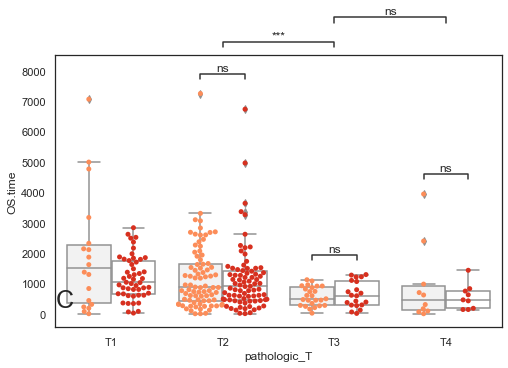

In [57]:
#graph of low and high XIST level and Tumor staging

sns.set(rc={'figure.figsize':(8,5)})

sns.set_style("white")
ax=sns.boxplot(x='pathologic_T', y='OS.time', data=clinical_survival_rna, order=['T1','T2','T3','T4'],hue='XIST level',color='w')
palette={'low XIST':'#fc8d59','high XIST':'#d7301f'}

sns.swarmplot(x='pathologic_T', y='OS.time', data=clinical_survival_rna, order=['T1','T2','T3','T4'],hue='XIST level',dodge=True,palette=palette)
plt.xticks(rotation=0)


#adding statistical values on the graph

add_stat_annotation(ax, data=clinical_survival_rna, x='pathologic_T', y='OS.time',order=['T1','T2','T3','T4'],hue='XIST level',
                box_pairs=[(('T2','low XIST'),('T2', 'high XIST')), (('T4','low XIST'),('T4', 'high XIST')),
                             (('T3','low XIST'),('T3', 'high XIST'))],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)

add_stat_annotation(ax, data=clinical_survival_rna, x='pathologic_T', y='OS.time',order=['T1 ','T2','T3','T4'],
                box_pairs=[('T2','T3'),('T3','T4')],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)


handles, labels = ax.get_legend_handles_labels()

plt.legend(handles[2:], labels[2:])


ax.get_legend().remove()
plt.text(-0.5,220,"C", fontsize=25)
#plt.savefig('grade_RGS5.eps', format='eps',bbox_inches='tight', dpi=1000)

plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

T1 v.s. T2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.203e-04 U_stat=7.526e+03
T2 v.s. T3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.855e+03
T3 v.s. T4: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.590e+02
T1 v.s. T3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.306e-02 U_stat=2.086e+03


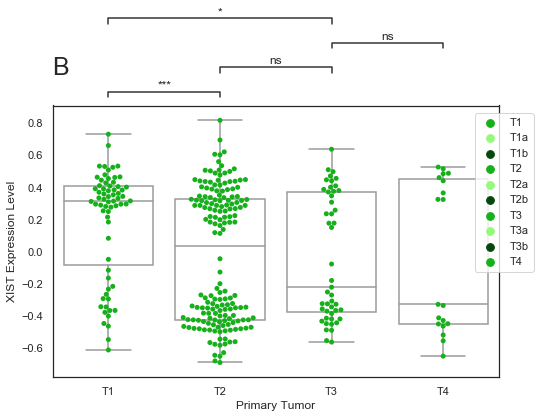

In [42]:
# Compression of expression of level of XIST gene by Tumor stage
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style("white")

ax=sns.boxplot(x='pathologic_T', y='XIST', data=clinical_survival_rna, order=['T1','T2','T3','T4'],color='w')

palette={'T1':'#15b01a','T1a':'#96f97b','T1b':'#06470c','T2':'#15b01a','T2a':'#96f97b','T2b':'#06470c','T3':'#15b01a','T3a':'#96f97b','T3b':'#06470c','T4':'#15b01a'}

sns.swarmplot(x='pathologic_T', y='XIST', data=clinical_survival_rna, order=['T1','T2','T3','T4'],hue= "pathologic_T",hue_order=['T1','T1a','T1b','T2','T2a','T2b','T3','T3a','T3b','T4'],palette=palette)
plt.xticks(rotation=0)

ax.legend(loc='right', bbox_to_anchor=(1.09,0.68),
          fancybox=True, shadow=False, ncol=1)


#adding statistical values on the graph
add_stat_annotation(ax, data=clinical_survival_rna, x='pathologic_T', y='XIST',order=['T1','T2','T3','T4'],
                box_pairs=[('T1','T3'),('T2','T1'),('T2','T3'),('T3','T4')], test='Mann-Whitney', text_format='star', loc='outside', 
verbose=2)
plt.xlabel('Primary Tumor')
plt.ylabel('XIST Expression Level')
plt.text(-0.5,1.1,"B", fontsize=25)

#plt.savefig('tumor_path.eps', format='eps',bbox_inches='tight', dpi=1000)
plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

N0 v.s. N1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.418e-02 U_stat=1.887e+04
N1 v.s. N2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.388e+03
N2 v.s. N3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.329e-01 U_stat=2.400e+01
N0 v.s. N2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.551e-01 U_stat=1.417e+04


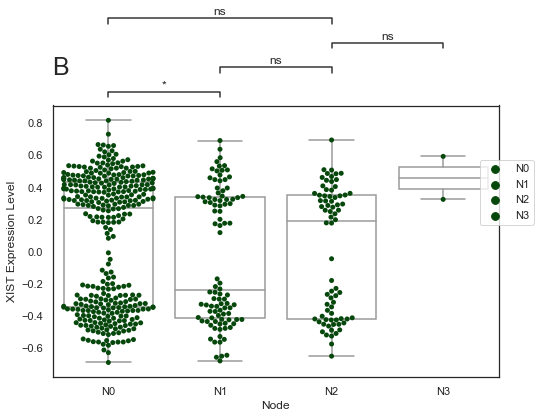

In [43]:
# Compression of expression of level of XIST gene by Node stage
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style("white")

ax=sns.boxplot(x='pathologic_N', y='XIST', data=clinical_survival_rna, order=['N0','N1','N2','N3'],color='w')

palette={'N0':'#06470c', 'N1':'#06470c', 'N2':'#06470c', 'N3':'#06470c'}

sns.swarmplot(x='pathologic_N', y='XIST', data=clinical_survival_rna, order=['N0','N1','N2','N3'],hue= "pathologic_N",hue_order=['N0','N1','N2','N3'],palette=palette)
plt.xticks(rotation=0)

ax.legend(loc='right', bbox_to_anchor=(1.09,0.68),
          fancybox=True, shadow=False, ncol=1)


#adding statistical values on the graph
add_stat_annotation(ax, data=clinical_survival_rna, x='pathologic_N', y='XIST',order=['N0','N1','N2','N3'],
                box_pairs=[('N0','N2'),('N1','N0'),('N1','N2'),('N2','N3')], test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

plt.xlabel('Node')
plt.ylabel('XIST Expression Level')
plt.text(-0.5,1.1,"B", fontsize=25)

#plt.savefig('tumor_path.eps', format='eps',bbox_inches='tight', dpi=1000)
plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

M0 v.s. M1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.861e-01 U_stat=3.060e+03


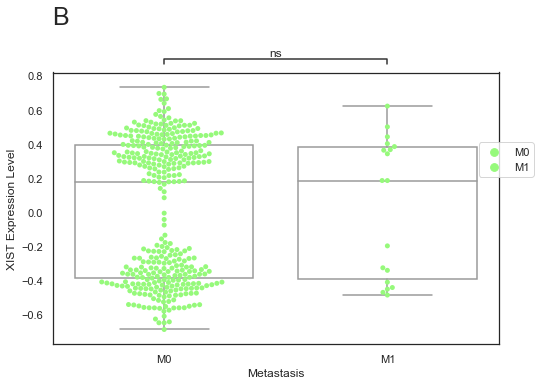

In [44]:
# Compression of expression of level of XIST gene by Metastasis stage
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style("white")

ax=sns.boxplot(x='pathologic_M', y='XIST', data=clinical_survival_rna, order=['M0','M1'],color='w')

palette={'M0':'#96f97b', 'M1':'#96f97b'}

sns.swarmplot(x='pathologic_M', y='XIST', data=clinical_survival_rna, order=['M0','M1'],hue= "pathologic_M",hue_order=['M0','M1'],palette=palette)
plt.xticks(rotation=0)

ax.legend(loc='right', bbox_to_anchor=(1.09,0.68),
          fancybox=True, shadow=False, ncol=1)


#adding statistical values on the graph
add_stat_annotation(ax, data=clinical_survival_rna, x='pathologic_M', y='XIST',order=['M0','M1'],
                box_pairs=[('M0','M1')], test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

plt.xlabel('Metastasis')
plt.ylabel('XIST Expression Level')
plt.text(-0.5,1.1,"B", fontsize=25)

#plt.savefig('tumor_path.eps', format='eps',bbox_inches='tight', dpi=1000)
plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Stage I v.s. Stage II: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.000e+00
Stage II v.s. Stage III: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=0.000e+00
Stage III v.s. Stage IV: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=0.000e+00
Stage I v.s. Stage III: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=0.000e+00


C:\Users\Joseph\anaconda3\lib\site-packages\scipy\stats\stats.py:6415: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


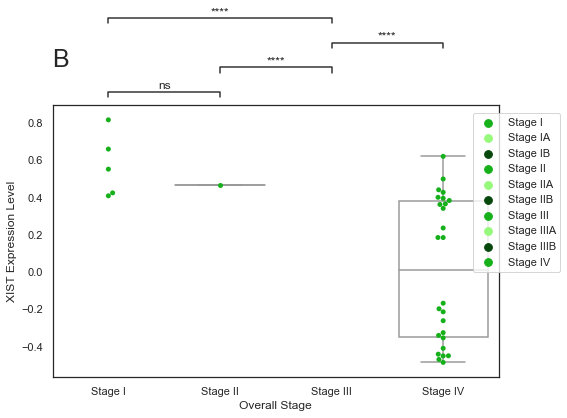

In [45]:
# Compression of expression of level of XIST gene by Tumor stage
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style("white")

ax=sns.boxplot(x='pathologic_stage', y='XIST', data=clinical_survival_rna, order=['Stage 1','Stage II','Stage III','Stage IV'],color='w')

palette={'Stage I':'#15b01a','Stage IA':'#96f97b','Stage IB':'#06470c', 'Stage II':'#15b01a','Stage IIA':'#96f97b','Stage IIB':'#06470c',
         'Stage III':'#15b01a','Stage IIIA':'#96f97b','Stage IIIB':'#06470c','Stage IV':'#15b01a'}

sns.swarmplot(x='pathologic_stage', y='XIST', data=clinical_survival_rna, order=['Stage I','Stage II','Stage III','Stage IV'],
              hue= "pathologic_stage",hue_order=['Stage I','Stage IA','Stage IB','Stage II','Stage IIA','Stage IIB','Stage III','Stage IIIA','Stage IIIB','Stage IV'],
              palette=palette)

plt.xticks(rotation=0)

ax.legend(loc='right', bbox_to_anchor=(1.15,0.68),
          fancybox=True, shadow=False, ncol=1)


#adding statistical values on the graph
add_stat_annotation(ax, data=clinical_survival_rna, x='pathologic_stage', y='XIST',order=['Stage I','Stage II','Stage III','Stage IV'],
                box_pairs=[('Stage I','Stage III'),('Stage II','Stage I'),('Stage II','Stage III'),('Stage III','Stage IV')], test='Mann-Whitney', text_format='star', loc='outside', 
verbose=2)
plt.xlabel('Overall Stage')
plt.ylabel('XIST Expression Level')
plt.text(-0.5,1.1,"B", fontsize=25)

#plt.savefig('tumor_path.eps', format='eps',bbox_inches='tight', dpi=1000)
plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

TUMOR FREE v.s. WITH TUMOR: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.037e-01 U_stat=2.499e+04


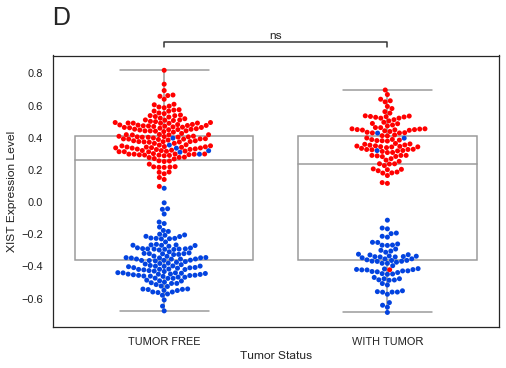

In [46]:
# Compression of expression of level of XIST gene by disease status

sns.set(rc={'figure.figsize':(8,5)})
sns.set_style("white")
ax=sns.boxplot(x='person_neoplasm_cancer_status', y='XIST', data=clinical_survival_rna, order=['TUMOR FREE','WITH TUMOR'],color='w')
palette={"MALE":"#0343df", "FEMALE":"red"}

#choose survival staus for hue
sns.swarmplot(x='person_neoplasm_cancer_status', y='XIST', data=clinical_survival_rna, order=['TUMOR FREE','WITH TUMOR'],hue='gender',palette=palette)
plt.xticks(rotation=0)


ax.legend(loc='right', bbox_to_anchor=(0.6,0.7),
          fancybox=True, shadow=False, ncol=1)

#adding statistical values on the graph
add_stat_annotation(ax, data=clinical_survival_rna, x='person_neoplasm_cancer_status', y='XIST', order=['TUMOR FREE','WITH TUMOR'],
              box_pairs=[('TUMOR FREE','WITH TUMOR')], test='Mann-Whitney', text_format='star', loc='outside', 
verbose=2)
ax.get_legend().remove()

plt.xlabel('Tumor Status')
plt.ylabel('XIST Expression Level')
plt.text(-0.5,1.1,"D", fontsize=25)
#plt.savefig('disease_free.eps', format='eps',bbox_inches='tight', dpi=1000)
plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

TUMOR FREE v.s. WITH TUMOR: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.037e-01 U_stat=2.499e+04


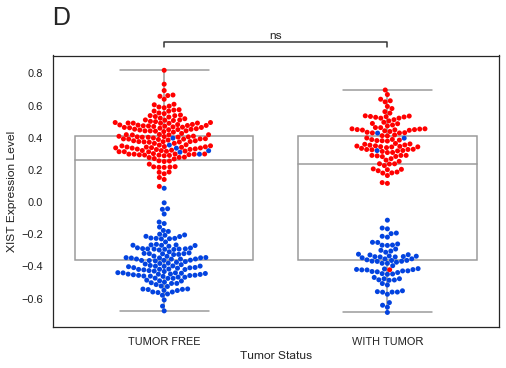

In [47]:
# Compression of expression of level of XIST gene by tumor status
   
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style("white")
ax=sns.boxplot(x='person_neoplasm_cancer_status', y='XIST', data=clinical_survival_rna, order=['TUMOR FREE','WITH TUMOR'],color='w')
palette={"MALE":"#0343df", "FEMALE":"red"}

#choose survival staus for hue
sns.swarmplot(x='person_neoplasm_cancer_status', y='XIST', data=clinical_survival_rna, order=['TUMOR FREE','WITH TUMOR'],hue='gender',palette=palette)
plt.xticks(rotation=0)


ax.legend(loc='right', bbox_to_anchor=(0.6,0.7),
          fancybox=True, shadow=False, ncol=1)

#adding statistical values on the graph
add_stat_annotation(ax, data=clinical_survival_rna, x='person_neoplasm_cancer_status', y='XIST', order=['TUMOR FREE','WITH TUMOR'],
              box_pairs=[('TUMOR FREE','WITH TUMOR')], test='Mann-Whitney', text_format='star', loc='outside', 
verbose=2)
ax.get_legend().remove()

plt.xlabel('Tumor Status')
plt.ylabel('XIST Expression Level')
plt.text(-0.5,1.1,"D", fontsize=25)
#plt.savefig('disease_free.eps', format='eps',bbox_inches='tight', dpi=1000)
plt.show()

Text(-480, 180, 'A')

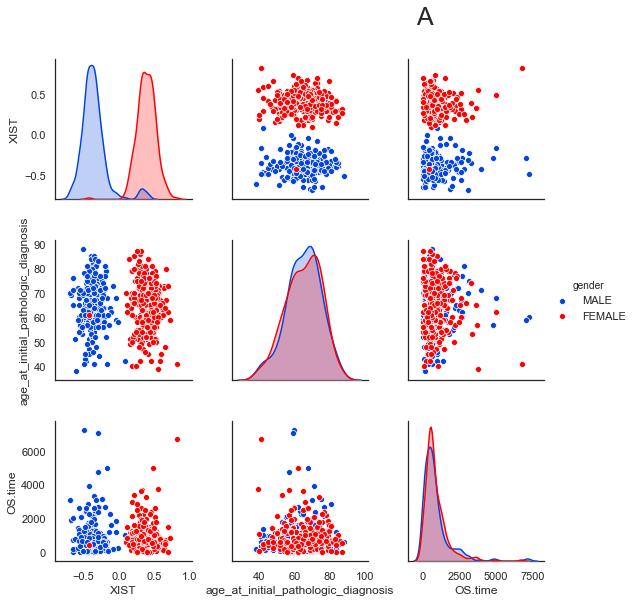

In [48]:
#correlation graph of XIST gene, survival month, and age of patients
palette={"MALE":"#0343df", "FEMALE":"red"}
sns.pairplot(clinical_survival_rna[['XIST','age_at_initial_pathologic_diagnosis','OS.time','gender']],hue='gender',palette=palette)
plt.text(-480,180,"A", fontsize=25)

Text(-480, 180, 'A')

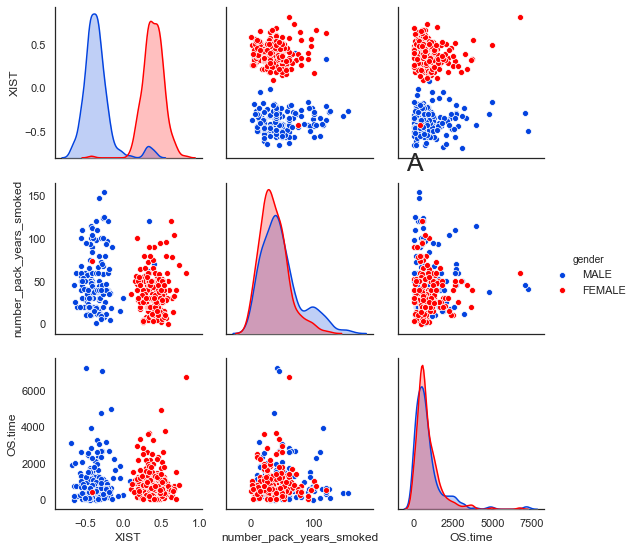

In [49]:
#correlation graph of XIST gene, years smoked, and overall survival time
palette={"MALE":"#0343df", "FEMALE":"red"}
sns.pairplot(clinical_survival_rna[['XIST','number_pack_years_smoked','OS.time','gender']],hue='gender',palette=palette)
plt.text(-480,180,"A", fontsize=25)

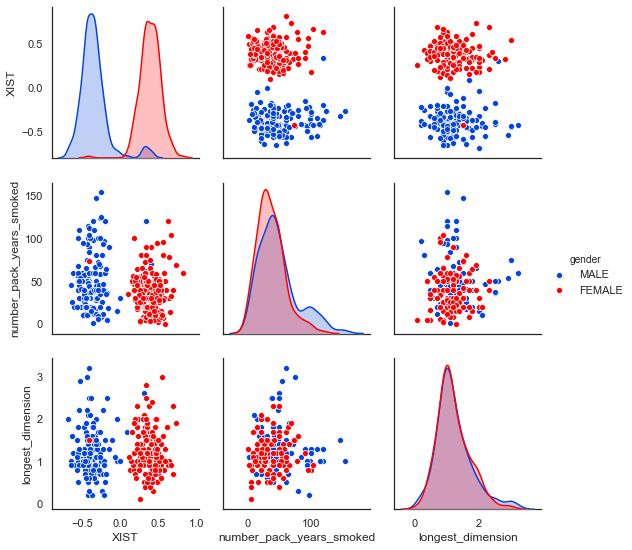

In [50]:
#correlation graph 
palette={"MALE":"#0343df", "FEMALE":"red"}
sns.pairplot(clinical_survival_rna[['XIST','number_pack_years_smoked', 'longest_dimension','gender']],hue='gender',palette=palette)
#plt.text(-480,180,"A", fontsize=25)

Text(-480, 180, 'A')

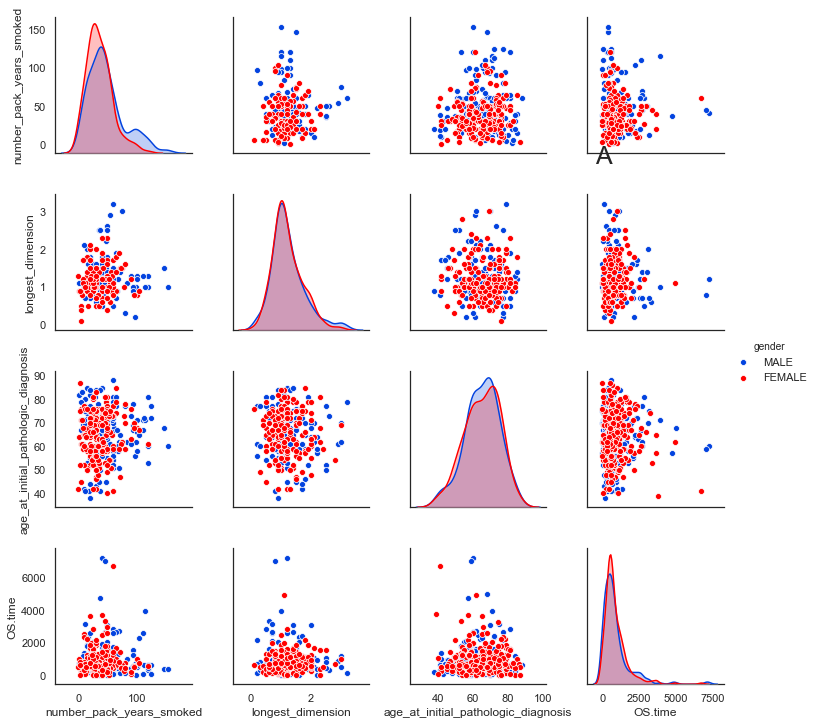

In [51]:
#correlation graph 
palette={"MALE":"#0343df", "FEMALE":"red"}
sns.pairplot(clinical_survival_rna[['number_pack_years_smoked', 'longest_dimension', 'age_at_initial_pathologic_diagnosis', 'OS.time','gender']],hue='gender',palette=palette)
plt.text(-480,180,"A", fontsize=25)

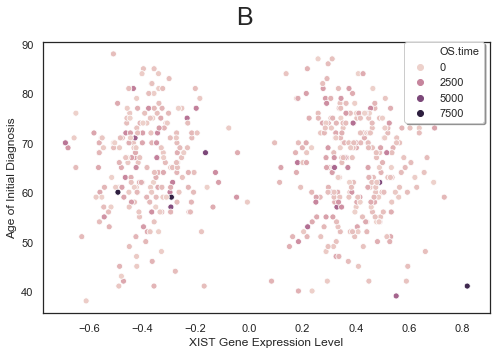

In [52]:
#correlation grapgh of XIST gene expression level and age of patients with using survival months for hue

ax=sns.scatterplot(x=clinical_survival_rna['XIST'] , y = clinical_survival_rna['age_at_initial_pathologic_diagnosis'],hue=clinical_survival_rna['OS.time'])

ax.legend(loc='right', bbox_to_anchor=(1,0.85),
          fancybox=True, shadow=True, ncol=1)
plt.xlabel('XIST Gene Expression Level')
plt.ylabel('Age of Initial Diagnosis')
plt.text(-0.05,94,"B", fontsize=25)
#plt.savefig('AGE_RGS5.eps', format='eps',bbox_inches='tight', dpi=1000)
plt.show()

C:\Users\Joseph\anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Joseph\anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

L-Lower_low XIST v.s. L-Lower_high XIST: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.944e-01 U_stat=2.290e+02
L-Upper_low XIST v.s. L-Upper_high XIST: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=7.295e+02
R-Upper_low XIST v.s. R-Upper_high XIST: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.592e+03
R-Lower_low XIST v.s. R-Lower_high XIST: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.565e+02
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

L-Upper v.s. L-Lower: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.760e

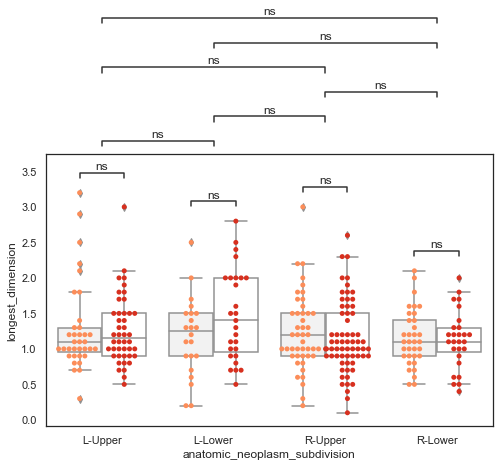

In [64]:
#graph of low and high XIST level, anatomic_neoplasm_subdivision, and longest_dimension

sns.set(rc={'figure.figsize':(8,5)})

sns.set_style("white")
ax=sns.boxplot(x='anatomic_neoplasm_subdivision', y='longest_dimension', data=clinical_survival_rna, order=['L-Upper','L-Lower','R-Upper','R-Lower'],hue='XIST level',color='w')
palette={'low XIST':'#fc8d59','high XIST':'#d7301f'}

sns.swarmplot(x='anatomic_neoplasm_subdivision', y='longest_dimension', data=clinical_survival_rna, order=['L-Upper','L-Lower','R-Upper','R-Lower'],hue='XIST level',dodge=True,palette=palette)
plt.xticks(rotation=0)


#adding statistical values on the graph

add_stat_annotation(ax, data=clinical_survival_rna, x='anatomic_neoplasm_subdivision', y='longest_dimension',order=['L-Upper','L-Lower','R-Upper','R-Lower'],hue='XIST level',
                box_pairs=[(('L-Upper','low XIST'),('L-Upper', 'high XIST')), (('L-Lower','low XIST'),('L-Lower', 'high XIST')),
                             (('R-Upper','low XIST'),('R-Upper', 'high XIST')),(('R-Lower','low XIST'),('R-Lower', 'high XIST'))],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)

add_stat_annotation(ax, data=clinical_survival_rna, x='anatomic_neoplasm_subdivision', y='longest_dimension',order=['L-Upper','L-Lower','R-Upper','R-Lower'],
                box_pairs=[('L-Upper', 'L-Lower'),('L-Upper', 'R-Upper'),('L-Upper', 'R-Lower'),('L-Lower', 'R-Upper'),('L-Lower', 'R-Lower'),('R-Upper', 'R-Lower')],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)


handles, labels = ax.get_legend_handles_labels()

plt.legend(handles[2:], labels[2:])


ax.get_legend().remove()
#plt.text(-0.5,220,"C", fontsize=25)
#plt.savefig('grade_RGS5.eps', format='eps',bbox_inches='tight', dpi=1000)

plt.show()